C:\Users\shree\AppData\Local\Temp\ipykernel_18596\2238554452.py:19: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(image))
C:\Users\shree\AppData\Local\Temp\ipykernel_18596\2238554452.py:19: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(image))
C:\Users\shree\AppData\Local\Temp\ipykernel_18596\2238554452.py:20: RuntimeWarning: divide by zero encountered in log
  log_transformed = (c * np.log(1 + image)).astype(np.uint8)
C:\Users\shree\AppData\Local\Temp\ipykernel_18596\2238554452.py:20: RuntimeWarning: invalid value encountered in multiply
  log_transformed = (c * np.log(1 + image)).astype(np.uint8)
C:\Users\shree\AppData\Local\Temp\ipykernel_18596\2238554452.py:20: RuntimeWarning: invalid value encountered in cast
  log_transformed = (c * np.log(1 + image)).astype(np.uint8)


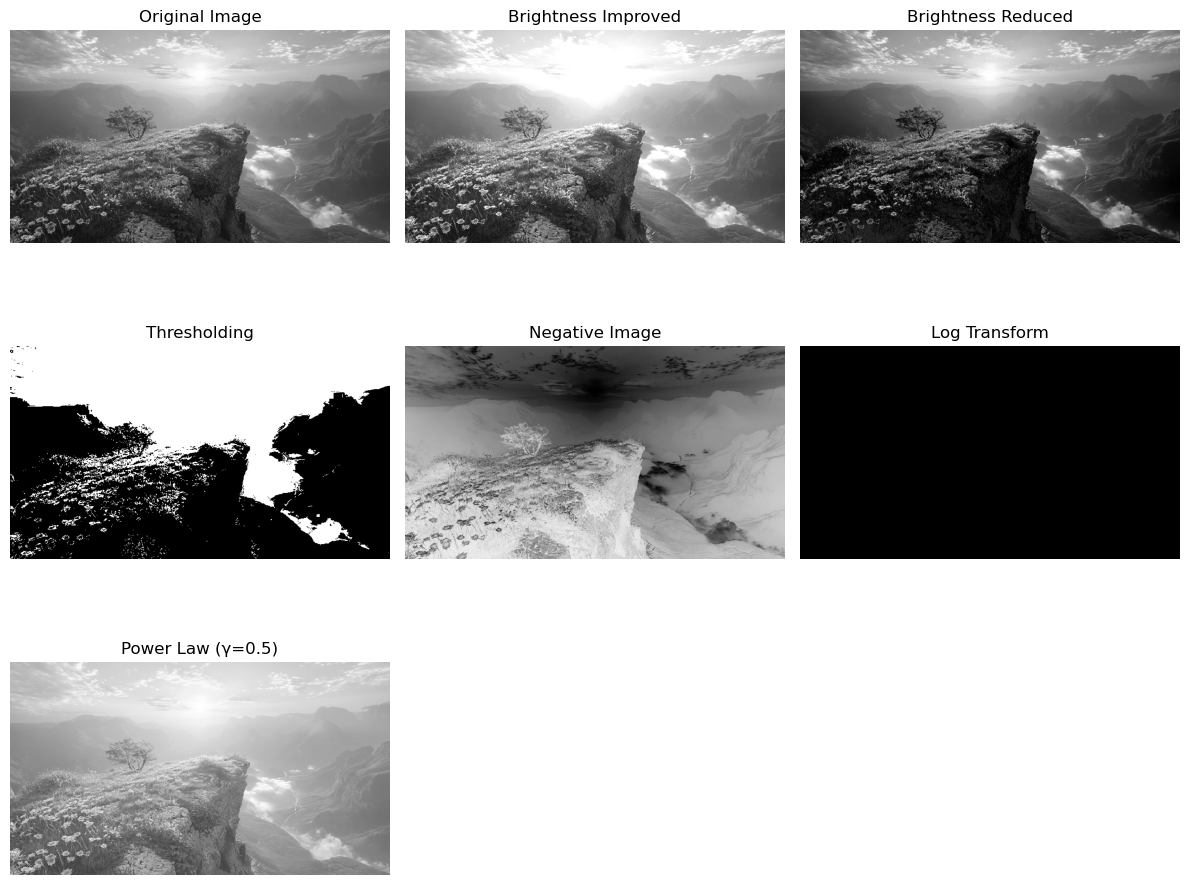

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("sample_img.jpg", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found!")
    exit()

brightness_improved = cv2.convertScaleAbs(image, alpha=1, beta=50) 

brightness_reduced = cv2.convertScaleAbs(image, alpha=1, beta=-50) 

_, thresholded = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

negative = 255 - image

c = 255 / np.log(1 + np.max(image))
log_transformed = (c * np.log(1 + image)).astype(np.uint8)

gamma = 0.5  
power_law = np.array(255 * (image / 255) ** gamma, dtype=np.uint8)

titles = [
    'Original Image', 
    'Brightness Improved', 
    'Brightness Reduced',
    'Thresholding', 
    'Negative Image', 
    'Log Transform', 
    f'Power Law (γ={gamma})'
]

images = [
    image, 
    brightness_improved, 
    brightness_reduced, 
    thresholded, 
    negative, 
    log_transformed, 
    power_law
]

plt.figure(figsize=(12, 10))
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
